# ESS330-intro-methods

Megan Hoover (Colorado State University)  
Lilly Zapalac (Colorado State University)  
Tessa (Colorado State University)

In [ ]:
library(broom)
library(visdat)
library(tidyr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ dials        1.4.0     ✔ rsample      1.2.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ recipes      1.2.0     ✔ yardstick    1.3.2
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()

## Section

This is a simple placeholder for the manuscript’s main document \[@knuth84\].

## Karenia Brevis Harmful Algal Blooms

#Introduction, Background, and Motivation

Problem Overview:  
Karenia Algal blooms are commonly known as the red tide and are toxic blooms that produce brevetoxins, a potent neurotoxin that can cause repository problems in humans. It can also accumulate in shellfish tissues that cause Neurotoxic Shellfish Poisoning (NSP) when ingested. This harmful brevetoxin producing algae, makes it hard to detect due to it being tasteless, having no odor, and remaining stable in hot or acidic environments. The Karenia algae doesn’t have a specific growing season, which makes it harder to predict when it will occur. The blooms are most present in the summer and fall but can also be problematic in other seasons as well. There isn’t currently a clear relationship of what causes this harmful algal bloom, but there are ongoing studies that are trying to understand how different nutrients affect or initiate the bloom due to high cell concentrations being mainly found close to shores \[see @U.S. National Office for Harmful Algal Blooms\]

Data overview:  
The data we’re using to better understand the red tide causing blooms, is provided by NOAA \[see @ NOAA\]. The excel sheet provided is from sites in Florida and Texas and contain data that span many decades. The same sites in both of the states have been tested on repeatedly throughout time, which will help to show patterns and relationships, if there’s any. It will also help to compare the different relationships between the variables. Location columns show the name of the water body that the Karenia Brevis algal are found and which city they’re found off. There’s also a column for latitude, longitude, date, time of the extraction, depth of water measures, ranking of algal cells per liter, salinity of the water in parts per trillion, water temperature measured in degrees Celsius, and the object id where the sites are being tested at. Even though there’s a lot of variables, there’s a lot of missing data for some columns.

The NOAA data will allow us to compare different Florida sites to see which variables have the most impact on the growth of Karenia brevis, causing the toxic red tides. This will allow us to determine if certain areas in Florida are more susceptible to red tides. Since the location is also provided in the excel sheets, we’ll be able to make a map of areas to show different intensities of algae blooms, and then we’ll be able to determine which region has more intense red tides. We can also make a graph with dates and the number of algae cells in the water within at different location to determine if the algae blooms have been increasing or decreasing in intensity and frequency. Knowing this information can help to inform policy makers and local communities about causes of this harmful algae species, and how to implement changes to decrease the blooms.

Methods overview: First we’ll look at the data and clean it to be usable. There are some columns that can be combined instead of being separate. We’ll combine the values and unit column, look at where na values are, select years of daily data that have sufficient information, and we’ll make sure the data makes sense. Then we’ll create a graph of average bloom concentration over the the three different time frames (2009,2012, and 2022) provided in data. Next, we’ll create a graph representing the change in red tide blooms from year to year in each sample location. Lastly, we’ll create maps of water condition indicators such as temperature in Celsius, salinity, and depth. The data will be tested using ANOVA to determine if there are significant differences between red tide prevalence at different Florida sites. A correlation test will be used to identify any correlation between temperature, salinity, depth, and cell count of Karenia brevis algal blooms. Using statistical tests and visualizations, we’ll create and analyze any connections to determine possible drivers of red tide blooms.

#Exploring Your Data

The data was taken from NOAA. Columns consist of locations of the water samples taken, latitude, longitude, date for each day of the month and year, time of the extraction, depth of water measures, ranking of algal cells per liter, salinity of the water in parts per trillion, water temperature measured in degrees Celsius, and the object id where the sites are being tested at.The data for Texas wasn’t able to be used, because it had very little data that didn’t match other measurement parameters used in the Florida sample sites. The data for Florida is sufficient to use for analyzing any trends. There’s a lot of missing data for salinity levels, so a monthly average might have to be used for each month. There’s also some years where there were less available data, so we chose years where there was enough data for each month. We deleted the Texas data in the excel worksheet, sorted and organized the samples by oldest to newest date. We’ll have to make an average per station, per month in our future graphs, but for now we have a general overview of the data.

New names:
• `` -> `...3`

e.g.:
  dat <- vroom(...)
  problems(dat)

Rows: 854958 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (7): State, DESCRIPTION, SAMPLE_DATE, GENUS, SPECIES, CATEGORY, WIND_S...
dbl  (10): LATITUDE, LONGITUDE, SAMPLE_DEPTH, cells_per_l, SALINITY_ppt, Wat...
lgl   (3): ...3, WIND_DIR, WIND_DIR_UNIT
time  (1): SAMPLE_TIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

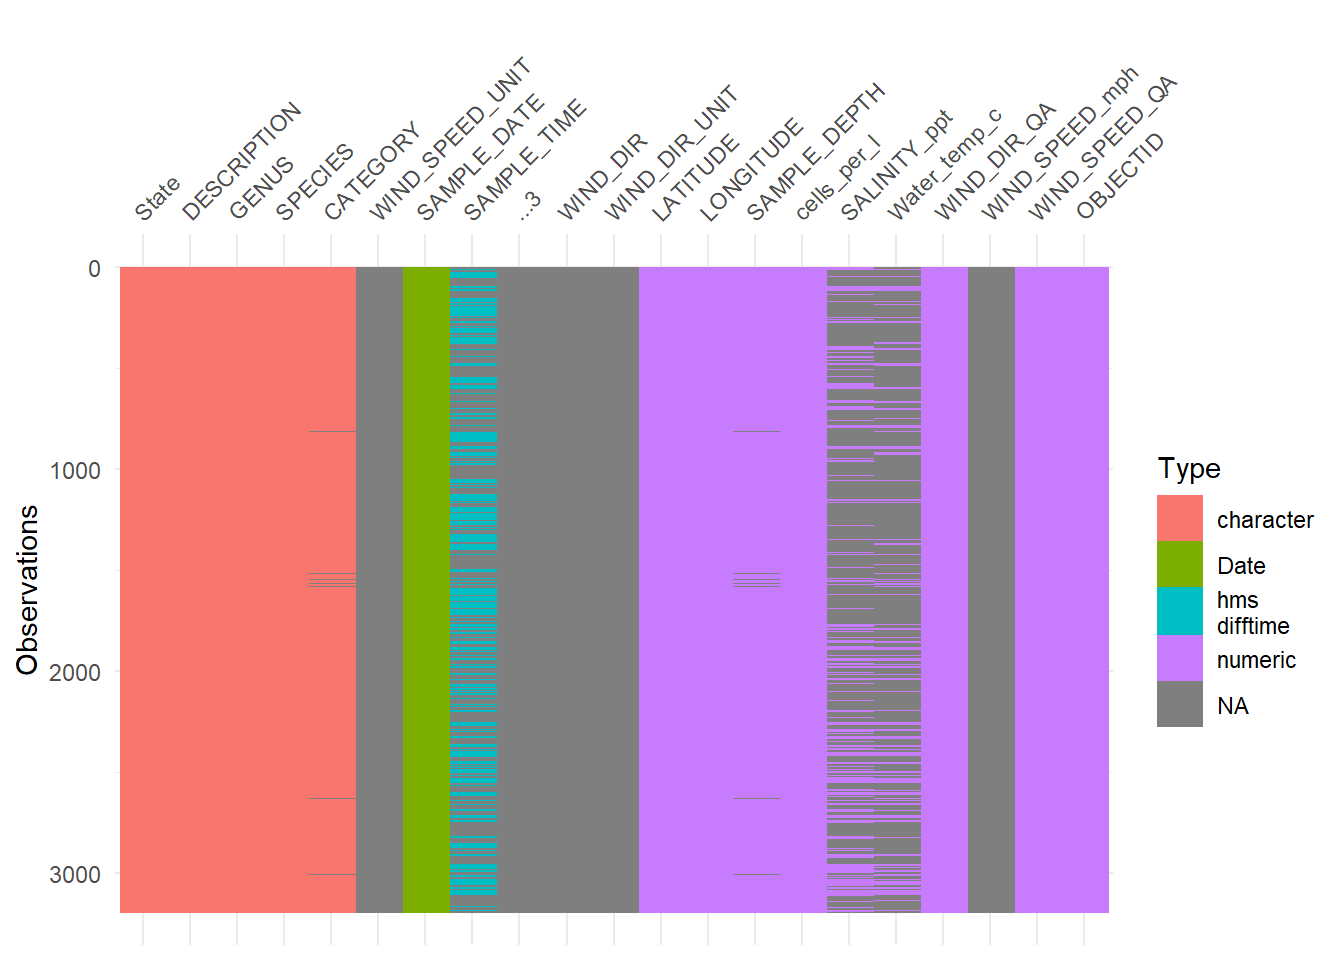

In [ ]:
#read in the csv file. Already sorted to contain just 2009,2012, and 2022
FL<-read_csv("C:/Users/samho/Desktop/ESS330/github/ESS330-intro-methods/ess330_fl_selected.csv")

There’s a lot of missing dating in the temperature, wind direction, wind direction unit, wind speed, and salinity columns. This is because the dataset is reporting on daily data. This problem can be fixed by taking averages for each month in the data.

Data Visualisions

(`geom_point()`).

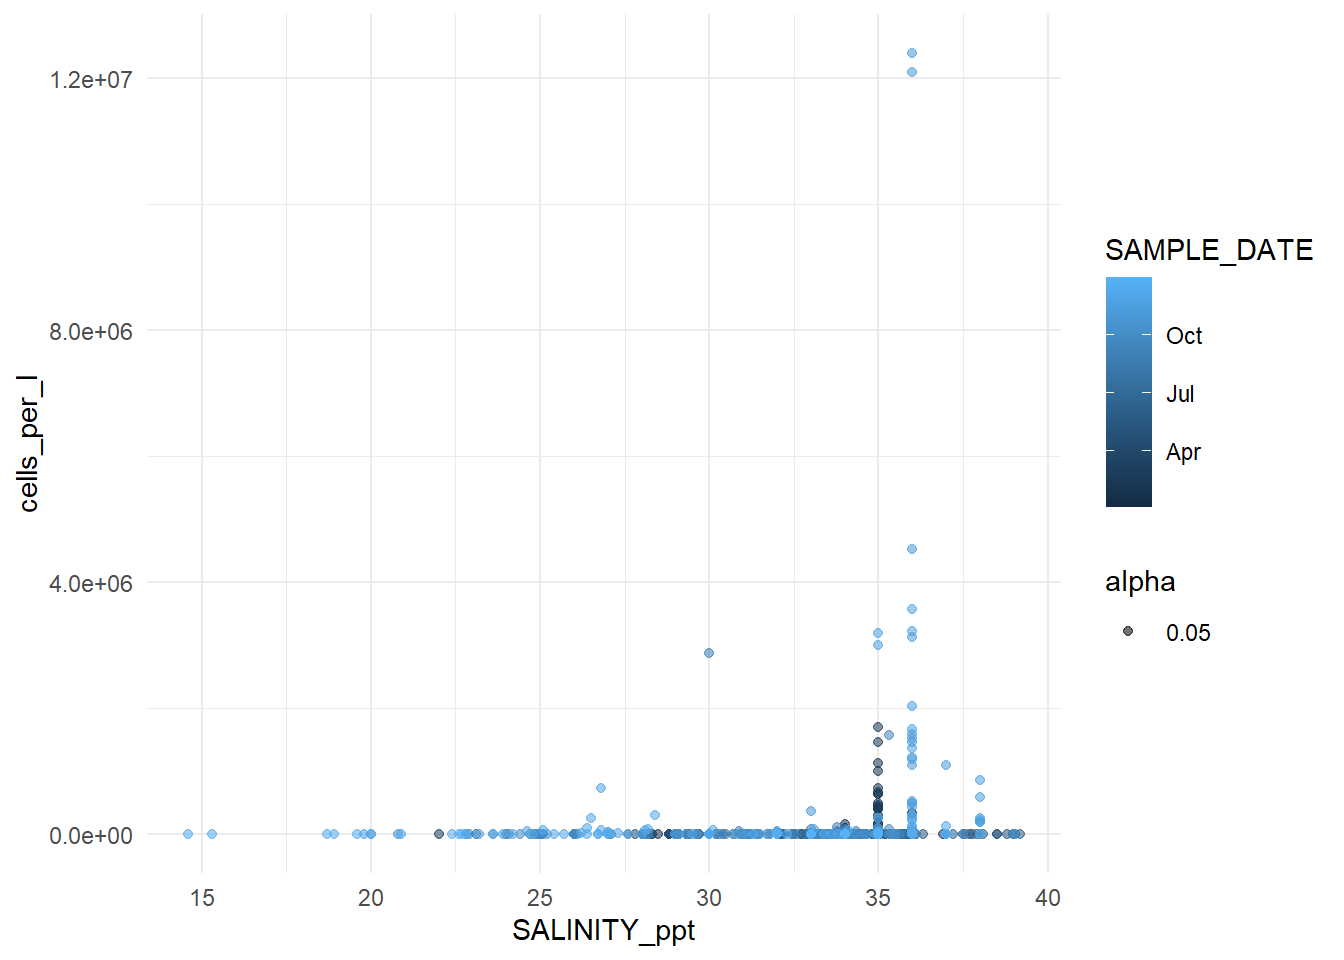

(`geom_point()`).

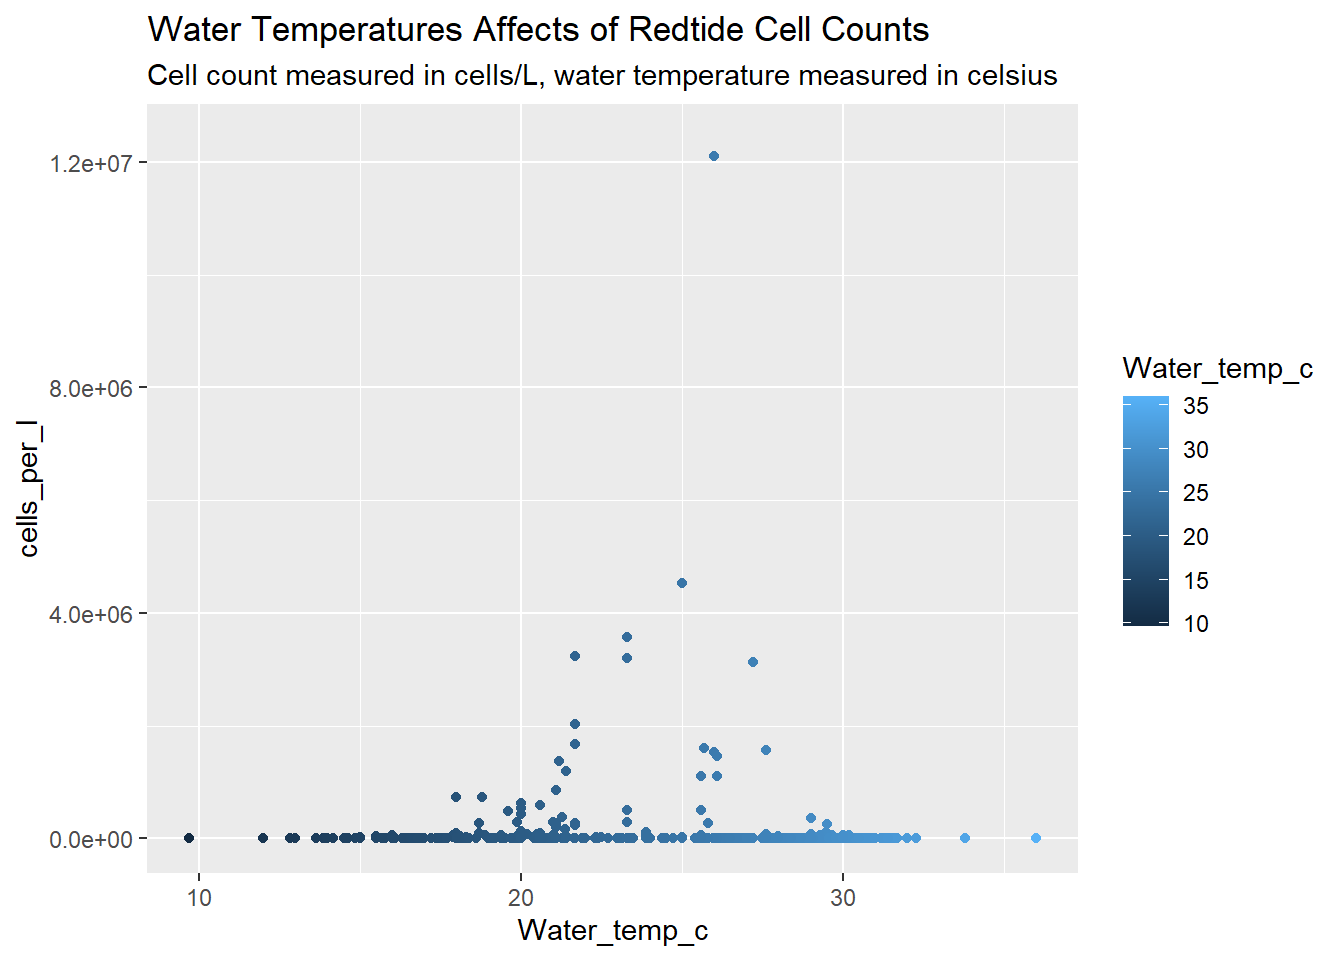

In [ ]:
#scatter plot of the cell counts and salinity with dates shown
FL_2002 %>%
  ggplot(aes(x = SALINITY_ppt, y = cells_per_l, color= SAMPLE_DATE, alpha= .05)) +
  geom_point() +
  theme_minimal()

Statistical Tests:

In [ ]:
#multiple regression
multiple_regression <- lm(cells_per_l ~ Water_temp_c + SALINITY_ppt + SAMPLE_DEPTH, data = FL_2002)

#p < 0.01 → very significant, p< .1 -> marginal
summary(multiple_regression)


Call:
lm(formula = cells_per_l ~ Water_temp_c + SALINITY_ppt + SAMPLE_DEPTH, 
    data = FL_2002)

Residuals:
     Min       1Q   Median       3Q      Max 
 -229294  -142244  -101646   -23348 11938643 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -456692     256990  -1.777  0.07608 . 
Water_temp_c    -3104       4929  -0.630  0.52908   
SALINITY_ppt    19599       7011   2.796  0.00535 **
SAMPLE_DEPTH   -13636      13032  -1.046  0.29583   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 628600 on 577 degrees of freedom
  (2612 observations deleted due to missingness)
Multiple R-squared:  0.015, Adjusted R-squared:  0.00988 
F-statistic: 2.929 on 3 and 577 DF,  p-value: 0.03313

              Df    Sum Sq   Mean Sq F value  Pr(>F)   
SALINITY_ppt   1 3.457e+12 3.457e+12   7.857 0.00517 **
Residuals    926 4.075e+14 4.401e+11                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
2265 observations deleted due to missingness

The multiple regression model shows that Out of the three predictor variables, salinity has the most significant relationship with cell counts. The ANOVA test also confirms that salinity is a factor in determining the cell counts of the harmful algal bloom.

# Preliminary Methods

For this project we will be using NOAA data on Karenia brevis (red tide) blooms and water conditions in Florida over in 2009, 2012, and 2022. We are using this data in order to identify any correlation between water conditions in terms of temperature, salinity, and depth impact on red tide blooms. First, we will look at the data and clean it to be usable. We’ll look at where na values are, combine the value and unit column, and make sure the data makes sense. Then we’ll create a graph of average bloom concentration over the the three different timeframes provided in the data Florida. Next, we will create a graph representing the change in red tide blooms from year to year in each sample location. Lastly, we will create maps of water condition indicators such as temperature in Celsius, salinity, and depth. The data will be tested using ANOVA to determine if there are significant differences between red tide prevalence at different Florida sites. We will also use a correlation test to identify any correlation between temperature, salinity, depth, and cell count of Karenia brevis algal blooms. Using statistical tests and visualizations, we’ll create and analyze any connections to determine possible drivers of red tide blooms. The results of this analysis will be discussed. Some supplemental data we can consider adding is data on nutrient levels and pollution in the water. The inclusion of this data would allow us to determine if nutrient and pollution run off impacts red tide blooms rather than or just more than water conditions. This way we can have a better idea if the conditions are causing algal blooms or if nutrient levels conditions are causing the blooms. If we’re unable to find enough data on this topic, we can report the possibility of other factors being the true reason for more blooms in the discussion section of our final report. A potential problem we had is some missing data across different testing sites, so we chose years that had enough data to compare cell counts to other variables. For now, our methods are focused on creating maps and graphs on water condition and red tide bloom spread in Florida with ANOVA and correlation statistical tests.